In [2]:
import pandas as pd
import numpy as np
import random
from sklearn import datasets
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

In [3]:
def read_json(path):
    data = None
    with open(path) as json_file:
        data = json.load(json_file)

    return data

In [4]:
data = read_json("privacy-experiments/resultados/data-original-diff.json")

In [5]:
**Define o mecanismo laplaciano para Differential Privacy**

SyntaxError: invalid syntax (<ipython-input-5-2e86be34251d>, line 1)

In [6]:
def laplaceMechanism(x, epsilon, sensib):
    x +=  np.random.laplace(0, (sensib/epsilon), 1)[0]
    return x

**Define a consulta que será utilizada para Differential Privacy**

In [7]:
def query(data_query):
  return statistics.mean(data_query)

In [8]:
def query_categorical(data_query):
    hist = dict()
    hist_aux = dict()
    for d in data_query:
        aux = dict(Counter(d))
        for k,v in zip(aux.keys(), aux.values()):
            if not k in hist:
                hist[k] = v
            else:
                hist[k] += v   
    
    return hist

In [20]:
def get_attr(general_data, key):
    values = list()
    for dt in general_data:
        dt = dict(dt)
        values.append(dt[key])
    
    return values

In [21]:
def get_values(general_data):
    keys = ['PatientAge','PatientWeigth', 'PatientHeigth']
    res = dict()
    for k in keys:
         res[k] = get_attr(general_data, k)

    return res

In [22]:
def sensitivity(data):
  tam = len(data)
  dist = list()
  for i in range(0,tam-2):
    d1 = data.copy()
    d2 = data.copy()
    del d1[i]
    del d2[i+1]

    d = abs(query(d1) - query(d2))
    dist.append(d)
  
  return(max(dist))

In [27]:
dt = get_values(data)
epsilon = [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in range(30):
    e = 0.01
    priv_final = []
    for i in range(30):
        priv_vals = dict()
        for k, v in zip(dt.keys(),dt.values()):
            senb = sensitivity(list(v))
            res = laplaceMechanism(query(v), e, senb)
            priv_vals[k] = res
        
        priv_final.append(priv_vals)
    

with open('./priv-diff-values/py-diff-priv-final.json', mode="a", encoding="utf-8") as f:
        json.dump(priv_final, f, ensure_ascii=False, indent=4)
        
        
new_dt = dict()
for k, v in zip(dt.keys(),dt.values()):
    new_dt[k] = statistics.mean(v)

with open('py-diff-orginal.json', mode="a", encoding="utf-8") as f:
            json.dump(new_dt, f, ensure_ascii=False, indent=4) 

**Aplica a privacidade nos dados selecionados**

In [21]:
sns.distplot(dt, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label="Normal")

#plt.legend(prop={'size': 16}, title = 'DP')
plt.title('Density Plot Differential Privacy Applied')
plt.xlabel('petal length (cm)')
plt.ylabel('Density')

TypeError: float() argument must be a string or a number, not 'dict'

In [68]:
val = np.random.laplace(0, (1/0.1), len(dt))
sns.distplot(val, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label="Laplace")

NameError: name 'dt' is not defined

Text(0, 0.5, 'Density')

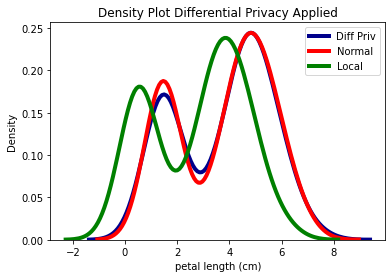

In [ ]:
sns.distplot(priv_vals, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label="Diff Priv")

sns.distplot(dt, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label="Normal")